<a href="https://colab.research.google.com/github/awhooshingwind/Math254/blob/main/jpierson_wp2_suppl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.patches import Circle, PathPatch, Rectangle
import mpl_toolkits.mplot3d.art3d as art3d
import numpy as np
import sympy as sym

from scipy import integrate

import plotly.express as px

sym.init_printing()

# Inevitabilities on Either End of Infinity
Things happen.  In life, this is a rare certainty. And mathematically, it is probably normal – or rather, a requirement for a probability density function. A density function models the likelihood that random variable falls within a particular range, given by the value of the integral taken over that range. Summing the entire range must equal one. And this makes sense, the likelihood that our random variable takes on any value must be certain – if we are considering every possible outcome, something happens.  

 For a continuous, normally distributed random variable, that density function is some parameterization of   

 $$ f\left(x\right)=\frac{1}{\sqrt{2\pi}}e^\frac{-x^2}{2} $$ 

 Functionally, this integrand is fundamentally difficult to evaluate. There does not seem to be a straightforward antiderivative to be found, with respect to $ x $. But we know the improper integral taken over its entire domain must equal one, since it is defined as a probability density. By adding a dimension to this function, we can consider the entire Cartesian plane and find an indirect approach to evaluate this improper integral and show   

$$ \int_{-\infty}^{\infty}{\frac{1}{\sqrt{2\ \pi}}e^{-\frac{x^2}{2}}\ dx=1} $$

First, let’s examine this dimensional shift graphically.


In [2]:
def f(x):
  return 1/np.sqrt(2*np.pi)*np.exp(-x**2/2)

def g(x,y):
  return np.exp(-x**2 - y**2)

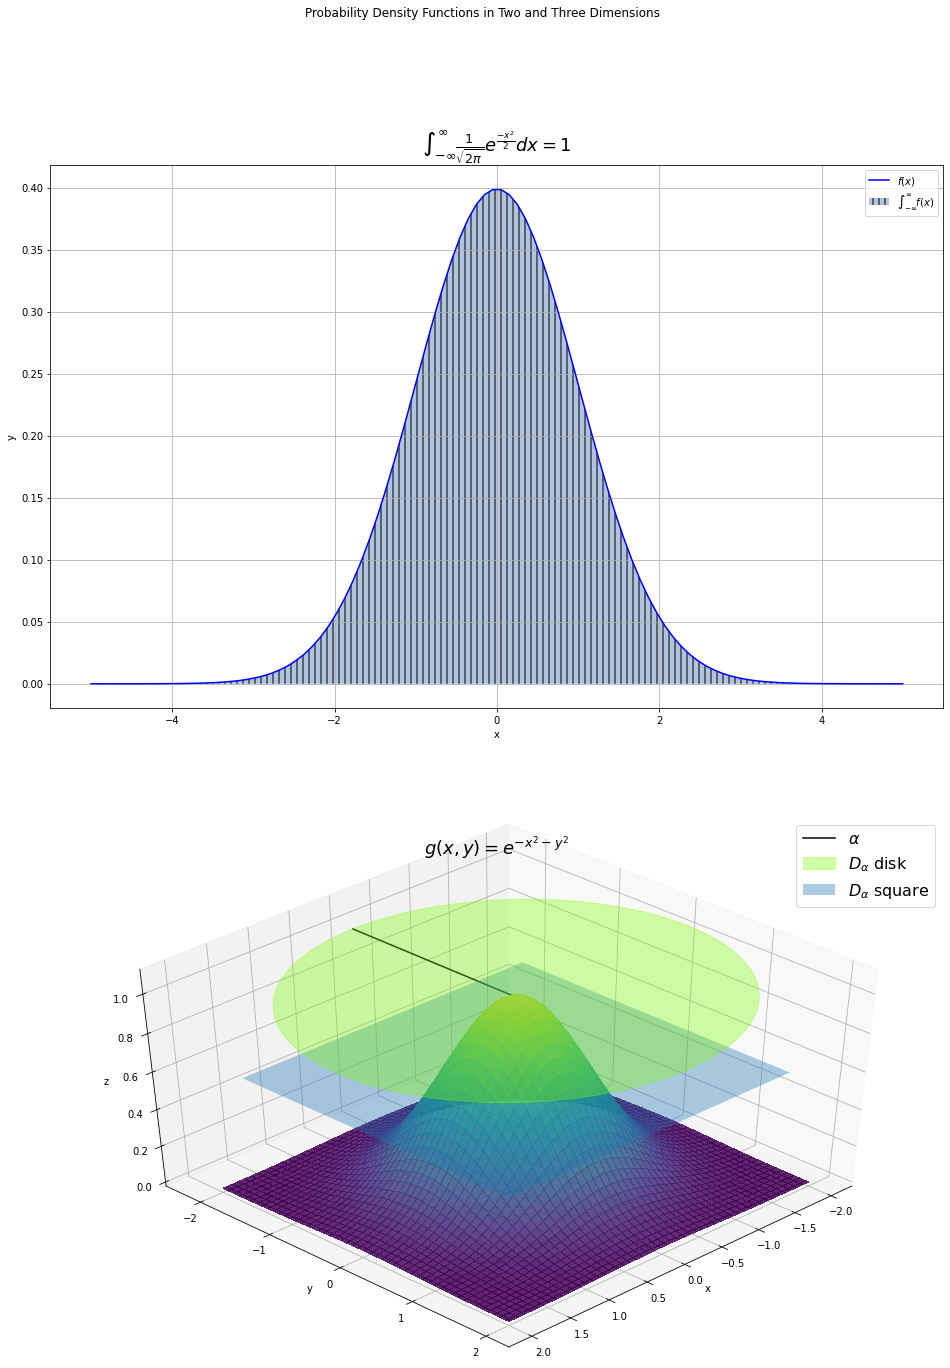

In [11]:
# Set up a figure
A = (16,22)
fig = plt.figure(figsize=A)
fig.suptitle('Probability Density Functions in Two and Three Dimensions')

# First subplot
ax = fig.add_subplot(2, 1, 1, xlabel='x', ylabel='y', title=r'$ \int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi}} e^{\frac{-x^2}{2}} dx = 1 $')
ax.title.set_size(18)

# Parameters
xmin = -5
xmax = 5
n = 100

# Make Data
t1 = np.linspace(xmin, xmax, n)
f_vals = f(t1)

# 2D Plotting
ax.plot(t1, f_vals, 'b', label=r'$ f(x) $')
ax.fill_between(t1,0, f_vals, hatch='||', facecolor='lightsteelblue', label= r'$ \int_{-\infty}^{\infty} f(x) $')
plt.legend()
ax.grid(True)

# Establish second subplot
ax = fig.add_subplot(2, 1, 2, projection='3d', azim=45, elev = 45, title=r'$g(x,y) = e^{-x^2-y^2}$', xlabel='x', ylabel='y', zlabel='z')
ax.title.set_size(18)

# Make Data
X = np.linspace(-2, 2, 100)
Y = X
X, Y = np.meshgrid(X, Y)
Z = g(X,Y)

# overlay circle patch
a = 2.2
zmax = 0.9
ax.plot([0,0], [0, -a], zmax+0.1,'k', label=r'$\alpha$')
circ = Circle((0, 0), a, alpha=0.34, label=r'$D_\alpha $ disk', color='chartreuse')
square = Rectangle((-1.8,-1.8),3.6,3.6, alpha=0.37, label=r'$D_\alpha $ square')
ax.add_patch(circ)
ax.add_patch(square)

# 3D Plotting
art3d.pathpatch_2d_to_3d(circ, z=zmax+0.1, zdir='z')
art3d.pathpatch_2d_to_3d(square, z=zmax-0.3, zdir='z')
surf = ax.plot_surface(X, Y, Z,  linewidth=0.8, cmap=cm.viridis, antialiased=False, alpha=0.85)
ax.set_zlim(0, zmax+0.2)
plt.legend(loc='best', fontsize=16)

plt.show()

## Computation of Improper Integral Probability Density Function

Show that:
$$ \int_{-\infty}^{\infty} \frac{1}{\sqrt{2 \pi}}e^{\frac{-x^2}{2}} dx = 1 $$

consider $ g(x,y) = e^{-x^2-y^2} $

integrate over all of $R^2$
$$ \iint\limits_{R^2} g(x,y) \ dA $$

switch to polar coordinates
$$ g(r,\theta) = e^{-(x^2+y^2)} = e^{-r^2} $$  

$$ \lim_{\alpha \to \infty} \int\limits_{0}^{2 \pi} \int\limits_{-\infty}^{\alpha} g(r,\theta)drd\theta = \int\limits_{0}^{2 \pi} \int\limits_{0}^{\alpha} r e^{-r^2}drd\theta$$
  



$$  $$

perform u-substiution, let $ u = -r^2, \  du = -2 dr $

$$ \int\limits_{0}^{2 \pi} -\frac{1}{2} \int\limits_{0}^{-\alpha} e^u du d\theta $$

compute iterated integral, starting with respect to $ \theta $
$$ \frac{1}{2} \int\limits_{-\alpha}^{0}2\pi  \ e^u du =  \pi \int\limits_{-\alpha}^{0} e^u du $$

undoing u-substitution and evaluating the integral gives

$$ \pi [e^{-r^2} ]_{-\alpha}^{0} $$
taking the limit as $ \alpha \rightarrow \infty $

$$ \lim_{\alpha \to \infty} \pi(e^{-0^2}- e^{-\alpha^2}) = \pi (1-0) = \pi $$

In the spirit of taking limits, we can also integrate $ g(x,y) $ over the entire Cartesian plane using squares so that
$$  \lim_{\alpha \to \infty} \int\limits_{0}^{2 \pi} \int\limits_{-\infty}^{\alpha} g(r,\theta)drd\theta = \lim_{\alpha \to \infty} \int\limits_{-\alpha}^{\alpha} \int\limits_{-\alpha}^{\alpha} g(x,y) \ dx \ dy $$

and from symmetry and Fubini's theorem
$$ \int\limits_{-\alpha}^{\alpha} \int\limits_{-\alpha}^{\alpha} e^{-(x^2+y^2)} \ dx \ dy = \int\limits_{-\alpha}^{\alpha} e^{-x^2} \ dx  \int\limits_{-\alpha}^{\alpha} e^{-y^2} \ dy = \left(\int\limits_{-\alpha}^{\alpha} e^{-x^2} \ dx \right) ^2 $$

from above, we know this iterated integral evaluates to $ \pi $, so  

$$ \left(\int\limits_{-\alpha}^{\alpha} e^{-x^2} \ dx \right) ^2 = \pi^2 $$
and thus
$$ \int\limits_{-\alpha}^{\alpha} e^{-x^2} \ dx = \sqrt{\pi} $$

Bring it all together, perform a change of variables
let $ v = \frac{x}{\sqrt{2}}, dv = \frac{dx}{\sqrt2} $

$$ \lim_{\alpha \to \infty} \int\limits_{-\alpha}^{\alpha} \frac{1}{\sqrt{2 \pi}}e^{\frac{-x^2}{2}} dx = \lim_{\alpha \to \infty} \frac{1}{\sqrt{2 \pi}} \int\limits_{-\alpha}^{\alpha} \sqrt2 \ e^{-v^2} dv $$

this improper integral $ e^{-v^2}dv $ evaluates to $ \sqrt\pi $, as shown above, yielding
$$ \frac{1}{\sqrt{2 \pi}} (\sqrt{2\pi})  = 1 $$

In [4]:
# Numerical Integration (simpsons composite rule)

def simps(f,a,b,N=50):
    if N % 2 == 1:
        raise ValueError("N must be an even integer.")
    dx = (b-a)/N
    x = np.linspace(a,b,N+1)
    y = f(x)
    S = dx/3 * np.sum(y[0:-1:2] + 4*y[1::2] + y[2::2])
    return S

# Larger N values, result quickly converges to 1
sol_simps = simps(f, -5, 5, 1000)

sol_quad = integrate.quad(f, -6, 6)
print(sol_simps, sol_quad[0])

0.9999994266968382 0.9999999980268247


## Numerical Integration Approach  


Figure 1 suggests that our normally distributed variable likely falls between -2 and 2, and even more probably between -4 and 4, as the graph quickly approaches zero beyond those bounds. Using its symmetry about the y-axis, we could get a reasonable approximation of the integral by doubling the area of the trapezoid defined by the x-axis and the curve $ f\left(x\right)\ \left\{0\le x\le2\right\} $(estimating values graphically):

$$ \frac{0.05+0.4}{2}2=0.45\ast2=0.9 $$  

By adding more trapezoids, we could improve our approximation and see the value of the integral quickly approaches 1. However, our goal is to confirm the integral of this function over the entire range is equal to one. To compute that integral, let’s first consider a similar function,
$$ g\left(x,y\right)=e^{-x^2-y^2} $$
over all of R^2.


Evaluating this integral numerically, using the Composite Simpson's Rule approach, the result quickly approaches one, even without integrating over the entire range, so long as the number of subdivisions is sufficiently large (N). 

Using the scipy module to integrate (with quadrature approach) yields similar results, again over a much smaller range.

Alternatively, if you were Carl Friedrich Gauss, you could simply solve this integral eponymously

In [5]:
# Experimenting with symbolic integration with sympy
r, theta, x = sym.symbols('r theta x')
intx = sym.integrate(1/(sym.sqrt(2*sym.pi)*sym.exp(-x**2/2)), (x, -30, 30))
intr = sym.integrate(sym.exp(-r**2)*r, (theta, 0, 2*sym.pi))
int_theta = sym.integrate(intr, (r, 0, sym.oo))
out = [intx, intr, int_theta]
for o in out:
  display(o)

### Bonus polar experimentation

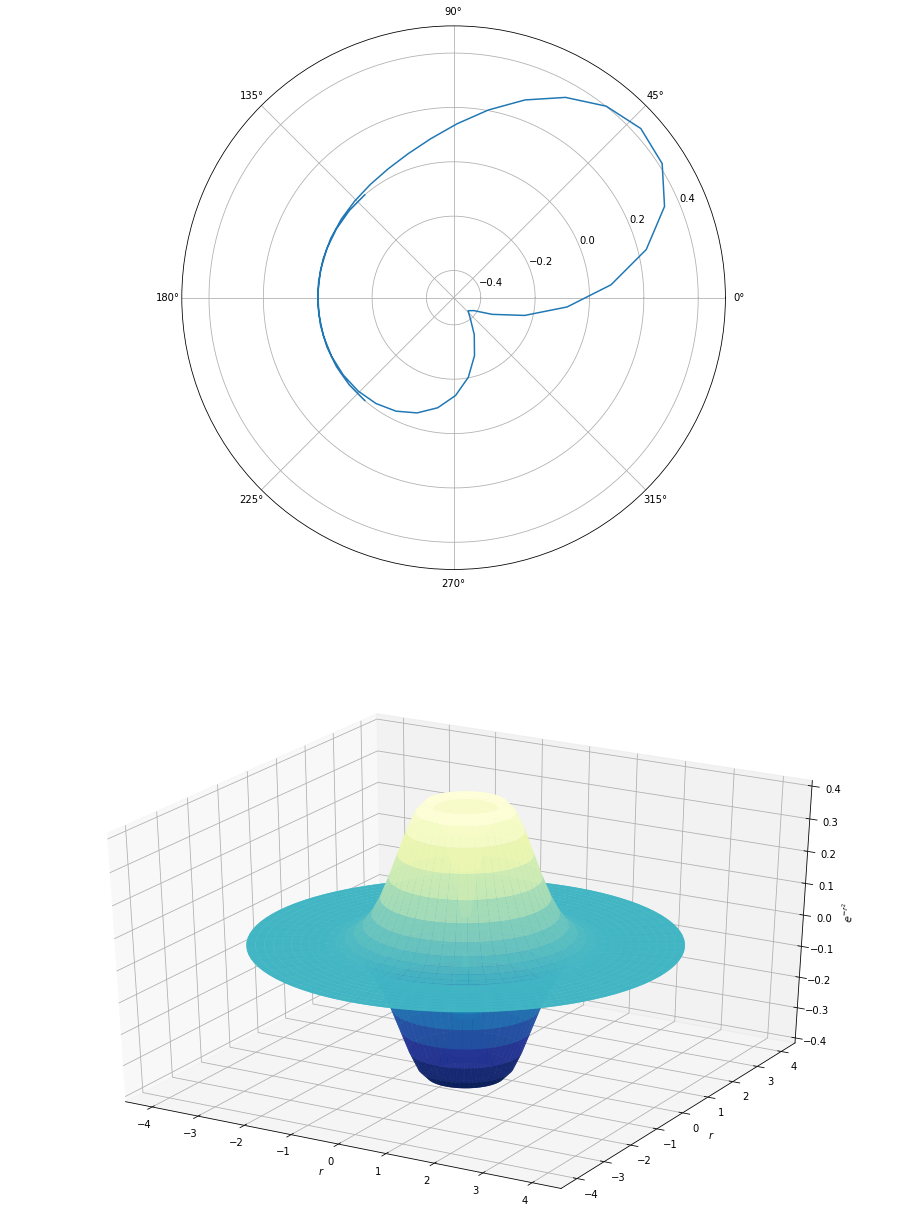

In [6]:
# Playing with Polar Coordinates

fig = plt.figure(figsize=A)

# First subplot
ax = fig.add_subplot(2, 1, 1, projection='polar')

# Create the mesh in polar coordinates and compute corresponding Z.
r = np.linspace(-4, 4, 50)
p = np.linspace(0, 2*np.pi, 50)
ax.plot(r, r*np.exp(-r**2))
ax.set_rlim(-0.5,0.5)
R, P = np.meshgrid(r, p)
Z = (R*np.exp(-R**2))

# Express the mesh in the cartesian system.
X, Y = R*np.cos(P), R*np.sin(P)

# Plot the surface.
ax = fig.add_subplot(2, 1, 2, projection='3d')
ax.plot_surface(X, Y, Z, cmap=plt.cm.YlGnBu_r, alpha=0.9)

# Tweak the limits and add latex math labels.
ax.set_zlim(-0.4, 0.4)
ax.set_xlabel(r'$r$')
ax.set_ylabel(r'$r$')
ax.set_zlabel(r'$e^{-r^2}$')

plt.show()